In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Procesamiento de Imágenes Digitales

Inteligencia Artificial 2024 I <br>
Practica Calificada 1, parte práctica de la evaluación (12 puntos).


**Integrantes:**

1.   Integrante 1: Victor Manuel Ramirez Tarazona
2.   Integrante 2: Anthony Joseph Ramos Ramos





Los objetivos de esta práctica son:

* Desarrollar y analizar rutinas de transformaciones puntuales en el procesamiento de imágenes.
* Repasar conceptos clave en el filtrado de imágenes y programar rutinas para suavizar y resaltar bordes.


## Requerimientos

Se necesita disponer del siguiente software:
* Python 3.X
* Las siguientes librerias científicas de Python: NumPy, SciPy, y Matplotlib.
* OpenCV.


## Contexto del problema - Reconocimiento del número de placa de automóviles

<!--<img src="./imagenes/sistema_acceso.png" width="400">-->
<img src='https://drive.google.com/uc?export=view&id=1bqoT6cX25c4lvHzfo2_ywSz-VqzBMzO1' width=400>


Recientemente, la Universidad Nacional de Ingeniería (UNI) está teniendo problemas con el acceso a los estacionamientos privados. Alguien ha hackeado el sistema de acceso, por lo que autos no autorizados se están estacionado ahí.

El rectorado ha solicitado a los estudiantes de la Asignatura de Inteligencia Artificial ayuda para implementar algúnos métodos más seguros que deberían incluirse en el nuevo sistema de seguridad.

Proporcionaron algunas imágenes de placas no autorizadas para facilitar el desarrollo del software: `placa_carro_1.jpg`, `placa_carro_2.jpg` and `placa_carro_3.jpg`.

# 2.1 Herramientas de procesamiento de Imagen

El procesamiento de imágenes engloba una serie de técnicas para mejorar la calidad general de una imagen (suavizado, mejora, etc.). Antes de profundizar en esas técnicas, conviene comprender algunos conceptos básicos:
- Histogramas de imagen
- Brillo y contraste
- Binarización
- Look up tables (LUT)

En las secciones siguientes se presentan estos conceptos en el contexto de un problema real.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interactive, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
import random
import nbconvert
''
images_path = './imagenes/'
#images_path = '/content/drive/MyDrive/imagenes/'

## 2.1.1 Histograma de una imagen

¡Y allá vamos! Estamos entusiasmados con la idea de desarrollar un software para ayudar a la UNI. Para ello, nos han proporcionado una lista de conceptos y técnicas que tenemos que dominar para diseñar un sistema de reconocimiento de placas con éxito.

El primero de ellos es el de  **histograma**:

- Una representación de la frecuencia de aparición de cada intensidad de color (nivel de gris) en la imagen.

- Se construye iterando sobre todos los píxeles de la imagen y contando las veces que cada color aparece. *Note que una imagen RGB tiene 3 histogramas, uno por canal.*

- Proporciona información estadística de la distribución de la intensidad, como el brillo o el contraste de la imagen.

Los conceptos de **brillo** y **contraste** son especialmente relevantes para el procesamiento de imágenes:

- *brightness*: average intensity of image pixels, so dark images have a low brightness, while lighter ones have a high brightness.

- *brillo*: intensidad media de los píxeles de la imagen, por lo que las imágenes oscuras tienen un brillo bajo, mientras que las más claras tienen un brillo alto.

- *contraste*: distancia al cuadrado de las intensidades respecto a la media, es decir, una medida de la calidad de la imagen dada su utilización de todas las intensidades de color posibles en el histograma.


Normalmente, una imagen de alta calidad tiene un brillo medio y un contraste alto.

¡El siguiente código ilustra estos primeros conceptos con algunos ejemplos!

*Funciones interesantes: [numpy.ravel](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html)*

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


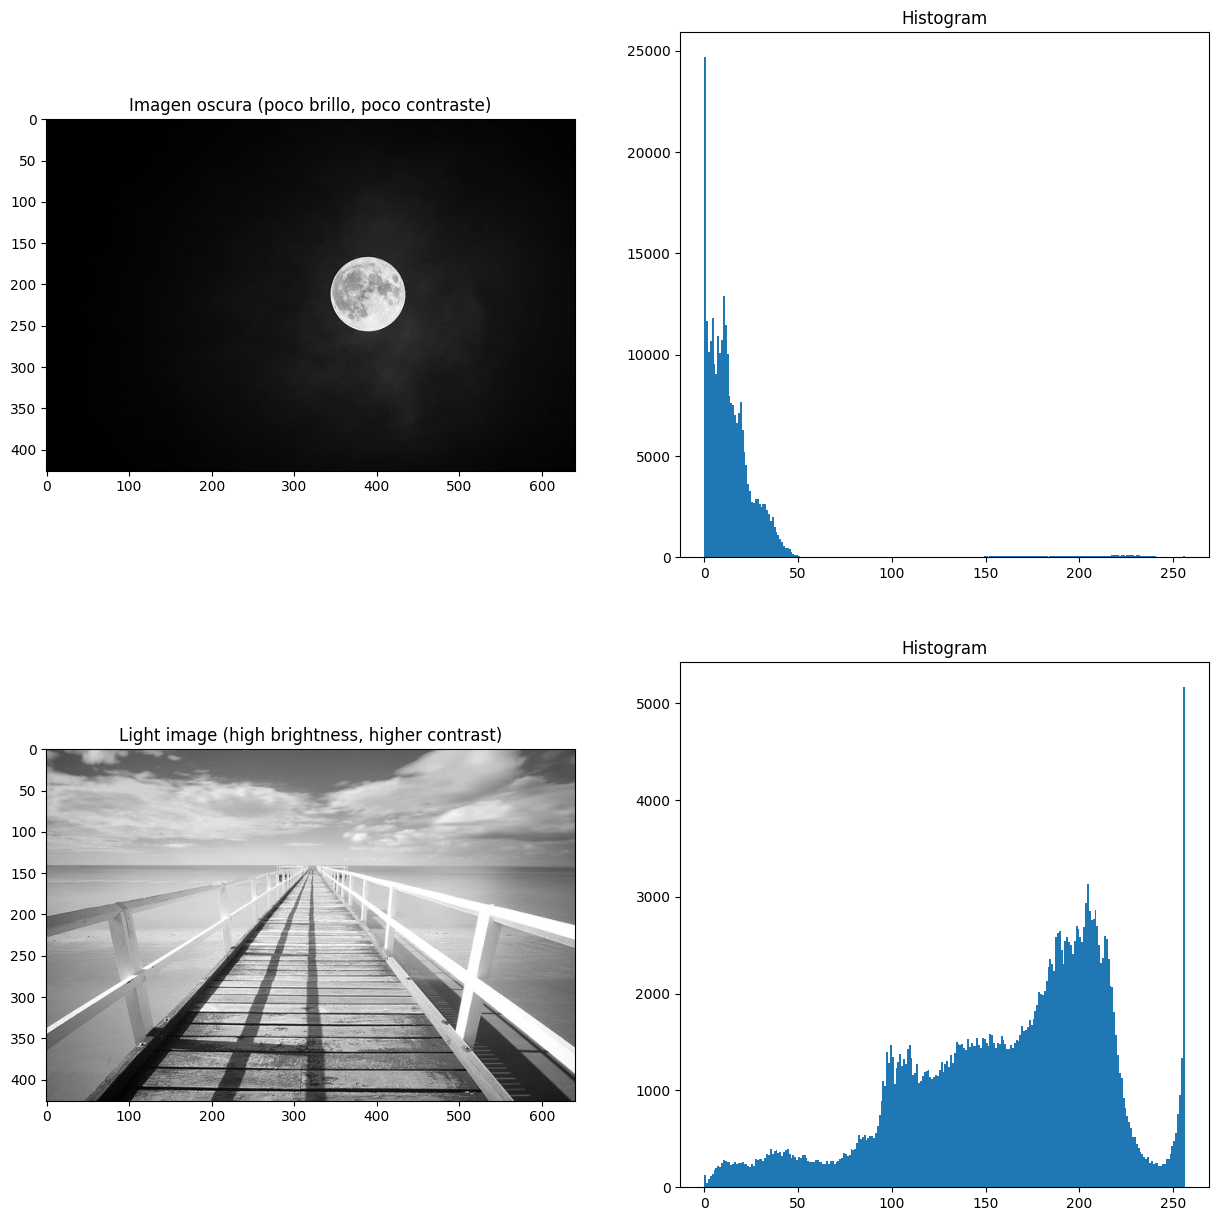

In [ ]:
# Leer imagen oscura y mostrarla
image = cv2.imread(images_path + 'paisaje_1.jpg',cv2.IMREAD_GRAYSCALE)
print(image)
plt.subplot(2,2,1)
plt.title("Imagen oscura (poco brillo, poco contraste)")
plt.imshow(image, cmap='gray')

# Ahora, muestra su histograma
plt.subplot(2,2,2)
plt.title("Histogram")
plt.hist(image.ravel(),256,[0,256]) # ravel() # ravel() devuelve una matriz 1-D, que contiene los elementos de la imagen

# Leer la imagen mas clara y mostrarla
image = cv2.imread(images_path + 'paisaje_2.jpg',cv2.IMREAD_GRAYSCALE)
plt.subplot(2,2,3)
plt.title("Light image (high brightness, higher contrast)")
plt.imshow(image, cmap='gray')

# Ahora, su histograma
plt.subplot(2,2,4)
plt.title("Histogram")
plt.hist(image.ravel(),256,[0,256])
plt.show()

## 2.1.2 Binarización

Una de las utilidades de los histogramas es el ajuste de umbrales (thresholds) para **binarización**. La binarización consiste en asignar el valor "0" o negro a los píxeles que tienen un valor de intensidad por debajo de un umbral dado (`th`), y el valor "1" o blanco a los que tienen una intensidad por encima del mismo. Formalmente:


$$
binarized(i,j)=\left\{\begin{matrix}
0 & \text{si } intensity(i,j) < th\\
1 & \text{de otro modo}
\end{matrix}\right. \ \ \ \forall i \in [0 \dots n\_rows], j \in [0 \dots n\_cols]
$$

En nuestro contexto, la binarización puede ser una gran herramienta para separar los caracteres que aparecen en la placa (con un color oscuro) del resto de la placa (con uno más claro). Esto eliminará información innecesaria dentro de la imagen. Así que ¡a aplicarlo!



### **<span style="color:green"><b><i>EJERCIO 1: Recortar una imagen</i></b></span>** (0.5 puntos)

Lee la imagen `placa_carro_1.jpg` y recórtala en un rectángulo que contenga la placa.

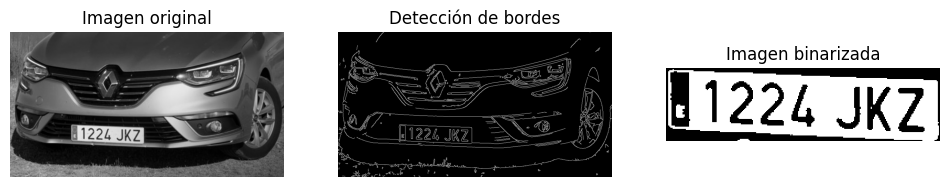

In [ ]:
# ** EJERCICIO 1 **

import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen en Google Drive
image_path = images_path+'/placa_carro_1.jpg'

# Cargar la imagen
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Comprobar si la imagen se ha cargado correctamente
if image is None:
    print("Error al cargar la imagen")
else:
    # Aplicar el detector de bordes Canny
    edges = cv2.Canny(image, 100, 200)  # Ajustar los valores de umbral según sea necesario

    # Encontrar contornos
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Obtener el contorno más grande (suponiendo que sea la placa del carro)
    largest_contour = max(contours, key=cv2.contourArea)

    # Obtener el rectángulo delimitador de la placa
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Recortar la región de interés
    cropped_image = image[y:y+h, x:x+w]

    # Binarización de la imagen recortada
    _, binary_image = cv2.threshold(cropped_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Mostrar la imagen original y la imagen binarizada
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title('Imagen original')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Detección de bordes')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Imagen binarizada')
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')

    plt.show()

Ahora, vamos a utilizar el primer concepto que aprendimos, los histogramas, para ver si la imagen es fácilmente binarizable, es decir, si la intensidad de los píxeles de la imagen se agrupan aproximadamente en torno a dos valores diferentes.
### **<span style="color:green"><b><i>EJERCICIO 2: Mostrar un histograma</i></b></span>** (1.5 puntos)

Mostrar el histograma de `image`.

*tIP: [Muestra el histograma usando matplotlib](https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.hist.html), los parámetros bins y range son realmente importantes!*



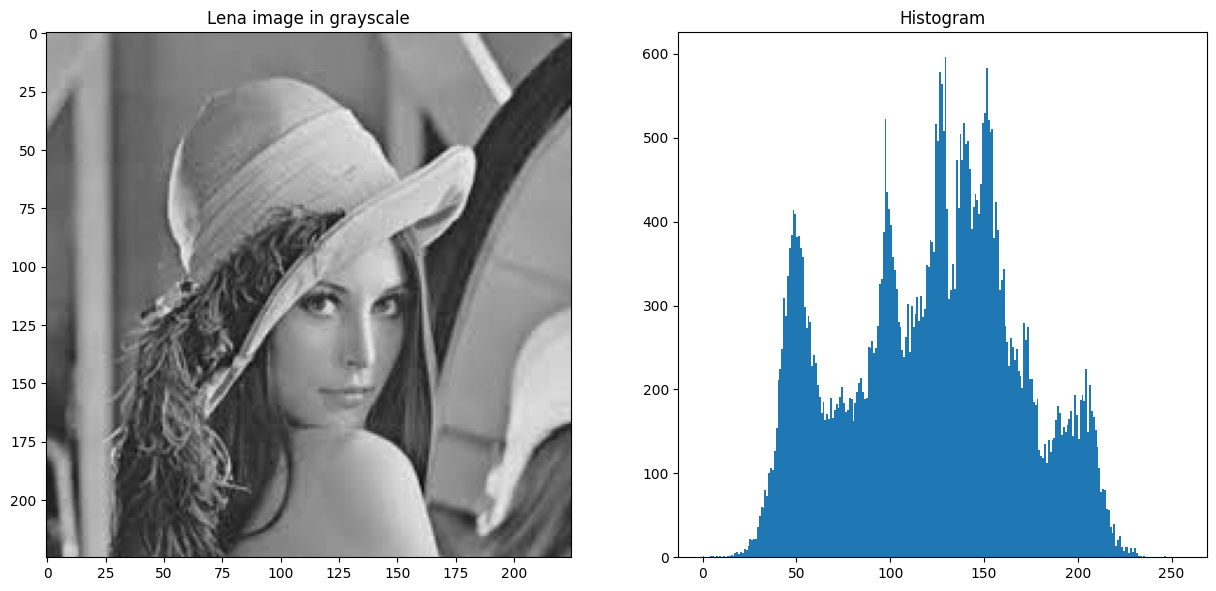

In [ ]:
# ** EJERCICIO 2 **
# Calcula el histograma de la imagen y muEstralo
# ¡Escribe tu codigo aquI!

#Leer imagen de la modelo en escala de grises
image = cv2.imread(images_path + 'lena.jpeg',cv2.IMREAD_GRAYSCALE)
plt.subplot(2,2,3)
plt.title("Lena image in grayscale")
plt.imshow(image, cmap='gray')

#Histograma de la modelo
plt.subplot(2,2,4)
plt.title("Histogram")
plt.hist(image.ravel(),256,[0,256])
plt.show()

- Según su (creciente) experiencia, ¿podríamos binarizar correctamente esta imagen?

No realmente, habria problemas porque hay varios picos de escala de grises en donde no se podria binarizar correctamente la imagen.
- ¿Qué umbral deberíamos utilizar?

Aunque si se quisiera binarizar, se podria intentar alrededor de 140-145 porque es donde divide la cantidad de picos en 2

Ahora que tenemos algunas pistas sobre cómo binarizar una imagen, echemos un vistazo a la [documentación de OpenCV](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) para desarrollarlo.

### **<span style="color:green"><b><i>EJERCICIO 3: Binarizar una imagen. Emocionante, ¿verdad?</i></b></span>** (1 punto)

Implementa una función que:
- toma una imagen gris y un umbral (threshold) como inputs,
- binariza la imagen,
- y la muestra!



In [ ]:
# ** EJERCICIO 3 **
#  Implementar una función que binarice una imagen y la muestre
# PD: Voy a hacer que tambien muestre la original para que se vea el cambio
def binarize(image,threshold):
    """ Binariza una imagen y la devuelve.
        Args:
            image:  Imagen a binarizar
            threshold: Los píxeles con valores de intensidad por debajo de
            este parámetro se ponen a 0 (negro), y los que están por encima
            a 255 (blanco).
        Returns:
            binarized: Imagen binarizada
    """
    # Mostrar imagen original
    plt.figure()
    plt.imshow(image, cmap='gray')
    # Separar para la imagen a binarizar
    image2 = np.zeros(image.shape, dtype=image.dtype)
    rows,cols = image.shape
    # Binarizar en base al threshold (umbral)
    for row in range(rows):
      for col in range(cols):
        if image[row,col]>threshold:  # Umbral
            image2[row,col] = 255
    # Mostrar resultados
    plt.figure()
    plt.imshow(image2,cmap='gray')
    plt.show()

picture=cv2.imread(images_path + 'lena.jpeg',cv2.IMREAD_GRAYSCALE)
interactive(binarize, image=fixed(picture), threshold=(0, 255, 10), display='inline')

interactive(children=(IntSlider(value=120, description='threshold', max=255, step=10), Output()), _dom_classes…

#### ¡Extra! interactuando con el código
Jupyter tiene algunos métodos interesantes que permiten interactuar con nuestro código, y vamos a aprovecharlos a lo largo del curso. Concretamente, utilizaremos la [función de interacción](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).
Para jugar un poco con ella, mueve el deslizador de abajo para cambiar el valor del umbral al llamar a la función `binarize()`.

In [ ]:
# Interactua con el valor umbral (threshold )
interactive(binarize, image=fixed(image), threshold=(0, 255, 25))

## 2.1.3 Look-up Tables (LUTs)

Otra técnica básica y ampliamente usada para el procesamiento de imágenes es la de las tablas de consulta (Look-up Tables, LUT). Una LUT es:
> Una tabla para buscar la intensidad de salida por cada una de entrada. Es decir, define una correspondencia entre los valores de intensidad de entrada y los de salida.
Tenga en cuenta que si trabaja con imágenes en color (por ejemplo, RGB), debe definir una LUT para cada canal de color.
Las LUTs son extremadamente útiles para modificar el brillo y el contraste de las imágenes, es decir, para adaptar sus histogramas según nuestras necesidades.

<!--<img src="./imagenes/brillante_contraste.png" width="1000"/> -->

<img src='https://drive.google.com/uc?export=view&id=1buMe-LFKCsuFaNHoYxVk0KsQxx4yqdeC' width="1000">

Por ejemplo, la siguiente figura muestra el resultado de aplicar una LUT en la que los píxeles con intensidades de 0 a 50 se asignan a 0 (negro), y los de 200 a 255 a 255 (blanco). Los píxeles con valores intermedios se asignan a valores de 1 a 254.

<!--<img src="./imagenes/resultado_lut.png" width="500"/>-->

<img src='https://drive.google.com/uc?export=view&id=1by9RropK9ILTzIw3zCykx6efSfQvviEc' width="500">

En cuanto a nuestro problema de reconocimiento de matrículas, al hacer esto eliminamos los valores de intensidad ruidosos alrededor del negro y el blanco, obteniendo una imagen más *limpia* (véase el histograma resultante). Y, por supuesto, ¡queremos probarlo!





### **<span style="color:green"><b><i>EJERCICIO 4a: ¡Las cosas se ponen serias, implementando una LUT!</i></b></span>** (1.5 puntos)

Implementa la función `lut_chart()` para:
- tomar una imagen gris y una LUT (array de 256 posiciones),
- mostrar un gráfico con las diferencias entre la imagen inicial y la resultante tras aplicar la LUT. *Sugerencia: [cómo crear subplots en Python](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html)*

*Consejo: Funciones interesantes: [cv2.LUT](https://docs.opencv.org/master/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)*  


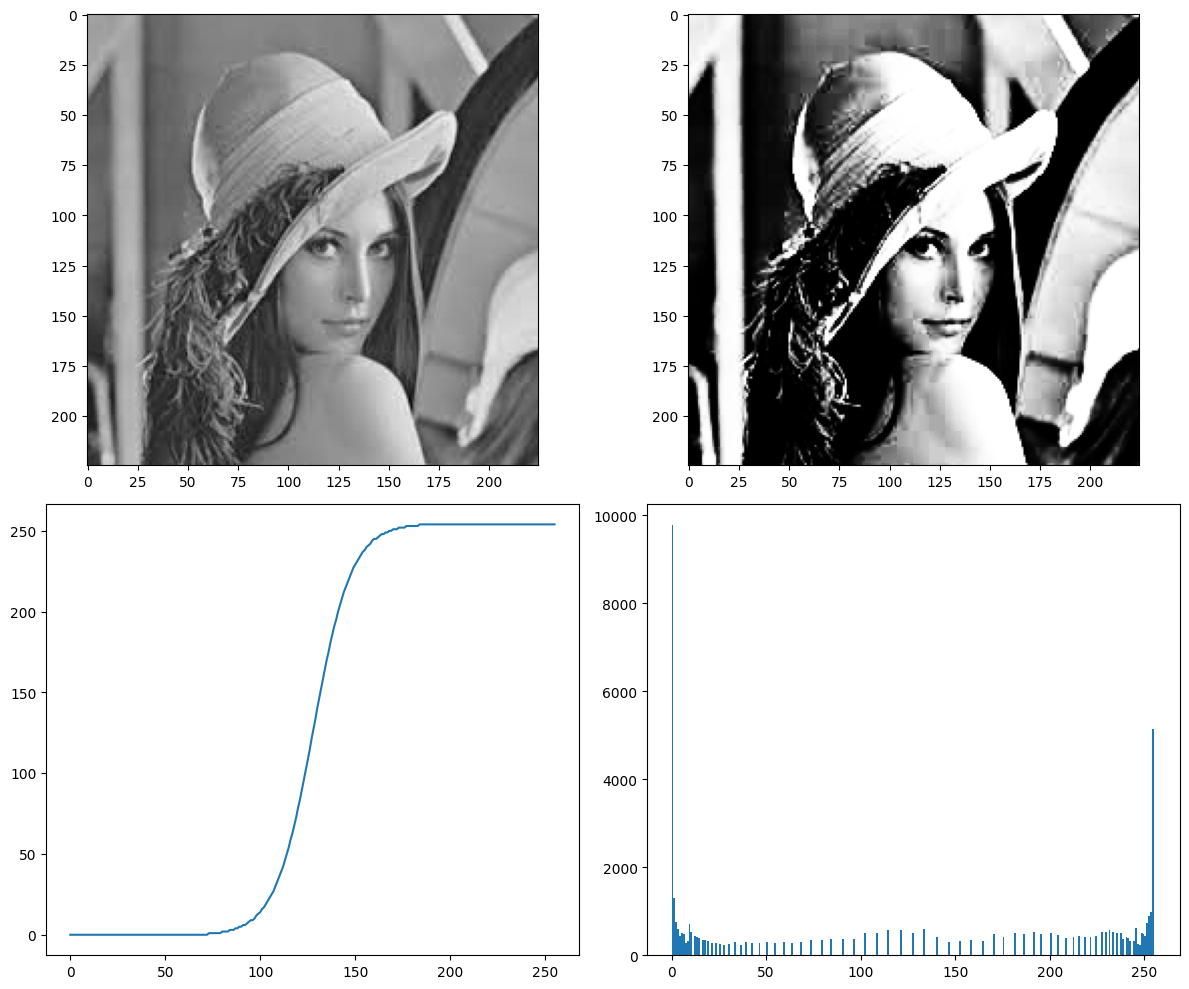

In [2]:
# ** EJERCICIO 4a **
# Implementa una función que tome una imagen gris y le aplique una LUT.
# Debe mostrar un gráfico 2x2 con
# -- imagen de entrada
# -- imagen resultante
# -- LUT empleada
# -- histograma de la imagen resultante
def lut_chart(image, lut):
    """ Aplica una LUT a una imagen y muestra el resultado.
        Args:
            image: Imagen de entrada a modificar.
            lut: una matriz de 256 elementos que representa una LUT,
            donde índices indexan los valores de entrada,
            y su contenido los de salida.
    """
    # Aplicar LUT
    image_lut=cv2.LUT(image,lut)
    # Creo los subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    # Mostrar la imagen inicial
    axes[0, 0].imshow(image, cmap='gray')
    # Mostrar la resultante
    axes[0, 1].imshow(image_lut, cmap='gray')
    # Mostrar (plot) la LUT utilizada
    axes[1, 0].plot(lut)
    # Y finalmente, el histograma resultante
    axes[1, 1].hist(image_lut.ravel(), 256, [0, 256])
    # Ajusto el diseño para que no se superpongan
    plt.tight_layout()
    plt.show()

#lut = np.arange(256, dtype=np.uint8)[::-1]
#lut = np.random.randint(0, 256, size=256, dtype=np.uint8)

#Hago un loot como en el ejemplo
"""
lut = np.zeros(256, dtype=np.uint8)  # Inicializa la LUT con ceros
lut[:51] = 0
lut[200:] = 255
for i in range(51, 200):
    lut[i] = int(255 * (i - 50) / (200 - 51))
"""
def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Definir los parámetros de la función logística
L = 255  # Amplitud de la curva
k = 0.1  # Pendiente de la curva
x0 = 128  # Posición horizontal de la curva en el eje x (mitad del rango de valores)

# Crear la LUT utilizando la función logística
lut = np.zeros(256, dtype=np.uint8)  # Inicializa la LUT con ceros
for i in range(256):
    lut[i] = logistic_function(i, L, k, x0)

picture = cv2.imread(images_path + 'lena.jpeg',cv2.IMREAD_GRAYSCALE)
lut_chart(picture,lut)


Por último, vamos a probar nuestra función `lut_chart()` con diferentes tablas de consulta. Intenta jugar con el brillo y el contraste para obtener una imagen mejorada.

### **<span style="color:green"><b><i>EJERCICIO 4b: Aplicando nuestra increible función</i></b></span>** (0.5 puntos)

- Crear un LUT (look-up table).
- Llama a nuestra función con ella como segundo argumento.

*Funciones interesantes:: [numpy.arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [numpy.clip](https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html)*

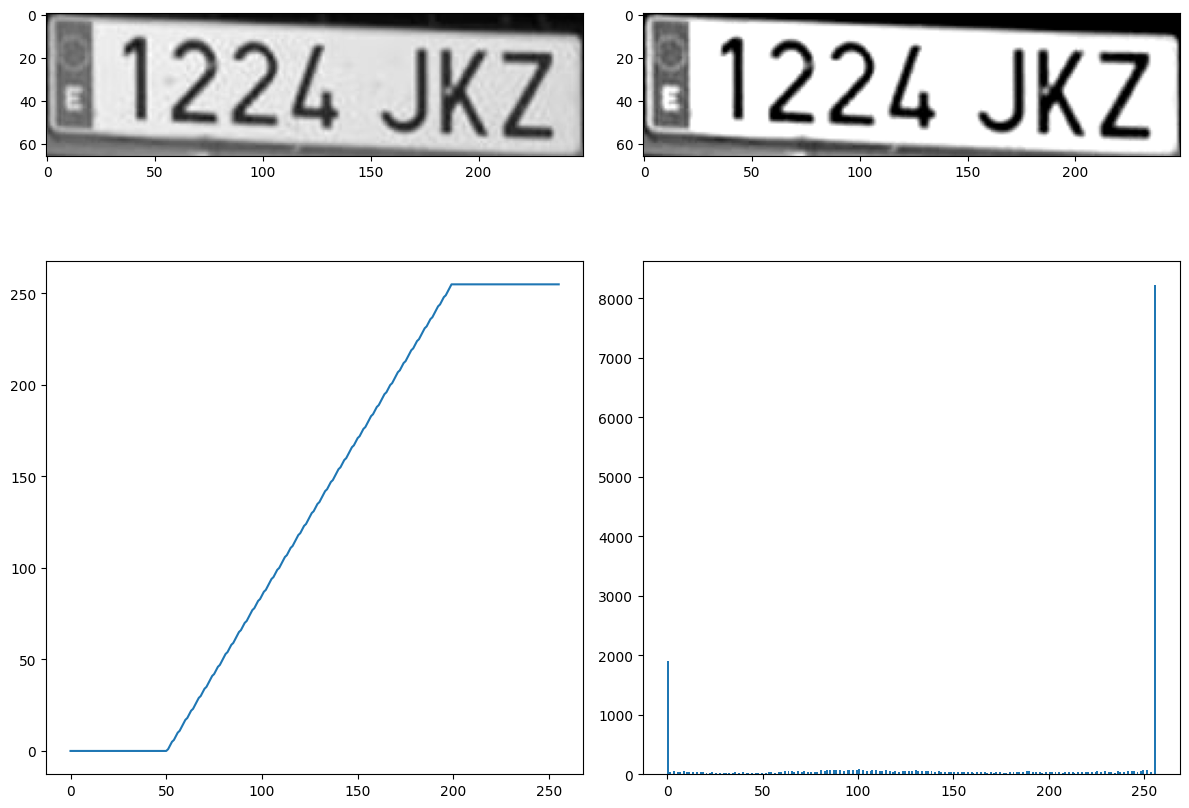

In [ ]:
# EJERCICIO 4b
# Crea el array LUT (echa un vistazo a las funciones numpy.arange y numpy.clip)
# Hago un LUT como en el ejemplo
lut = np.zeros(256, dtype=np.uint8)  # Inicializa la LUT con ceros
lut[:51] = 0
lut[200:] = 255
for i in range(51, 200):
    lut[i] = int(255 * (i - 50) / (200 - 51))

# Ejecuta nuestra función creada en la imagen (recortada) de la matrícula de
# autos que creaste en EX_2.1.1

lut_chart(cropped_image,lut)


## 2.1.4 Convoluciones

La convolución 2D, representada por el símbolo $\oplus$, es una herramienta fundamental en numerosas técnicas de tratamiento de imágenes (por ejemplo, suavizado de imágenes, detección de bordes, etc.). Concretamente, esta operación matemática es útil cuando se implementan operadores cuyos valores de píxel de salida son combinaciones lineales de los de entrada.
Hay dos actores principales en una convolución: **la imagen** y **el  kernel**. Ambas son matrices 2D, pero normalmente el **kernel  tiene un tamaño significativamente menor** comparado con la imagen. Definámoslas como:
- **Image (I)**: La imagen en la que se necesita alguna técnica de procesamiento de imágenes.  

<!--<img src="./imagenes/lena.jpeg" width="200"> -->
<img src='https://drive.google.com/uc?export=view&id=1bxjAwiEf-Edr5gHuaWIZGHZ4IY8oCU-q' width="200">

- **Kernel (K)**: Pequeña matriz 2D que define la operación lineal que se va a aplicar sobre la imagen.

<table>
	<tbody>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
	</tbody>
</table> $\\[5pt]$

Una vez que hemos definido la imagen de entrada y el kernel, la operación de convolución para un determinado píxel con coordenadas $r$ y $c$ resulta:$\\[5pt]$

$$O(r,c) = \sum_{i=-w}^w \ \sum_{j=-w}^w \ I(r+i, c+j) * K(-i, -j)$$


donde:  
- $O$ es la imagen de salida.  
- $w$ es el tamaño de apertura del kernel (por ejemplo, el kernel mostrado anteriormente tendría una apertura de $w=1$).



Pero, ¿qué hace realmente esta ecuación?  
> La convolución es el proceso de sumar cada elemento de la imagen de entrada con sus vecinos locales, ponderados por el kernel. Por ejemplo, si tenemos dos matrices de tres por tres, una de ellas un kernel y la otra un trozo de la imagen, la convolución es el proceso de **invertir las filas y columnas del kernel y luego multiplicar las entradas localmente similares y sumar**.


For example, the pixel value in the [2,2] position on the resulting image would be a weighted combination of all the entries of the image matrix, with weights given by the kernel.$\\[5pt]$


Por ejemplo, el valor del píxel en la posición [2,2] de la imagen resultante sería una combinación ponderada de todas las entradas de la matriz de la imagen, con pesos dados por el kernel.$\\[5pt]$


$$\left(\begin{bmatrix} 1 & 2 & 3\\ 4 & \color{red}5 & 6 \\ 7 & 8 & 9\end{bmatrix}  \oplus \begin{bmatrix} a & b & c\\ d & e & f \\ g & h & i\end{bmatrix} \right)\color{red}{[2,2]} = (1*i) + (2*h) + (3*g) + (4*f) + (5*e) + (6*d) + (7*c) + (8*b) + (9*a)$$

Como hemos dicho antes, si volteamos el núcleo en ambos ejes, la fórmula de la convolución se convierte en una multiplicación matricial por elementos:$\\[5pt]$

$$\left(\begin{bmatrix} 1 & 2 & 3\\ 4 & \color{red}5 & 6 \\ 7 & 8 & 9\end{bmatrix}  \oplus \begin{bmatrix} a & b & c\\ d & e & f \\ g & h & i\end{bmatrix} \right)\color{red}{[2,2]} = \left(\begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6 \\ 7 & 8 & 9\end{bmatrix} .* \begin{bmatrix} i & h & g\\ f & e & d \\ c & b & a\end{bmatrix} \right) = (1*i) + (2*h) + (3*g) + (4*f) + (5*e) + \ldots $$

Cuando se aplica la convolución, suele indexar fuera de los límites de la imagen, por ejemplo:$\\[5pt]$

$$\left(\begin{bmatrix} \color{red}1 & 2 & 3\\ 4 & 5 & 6 \\ 7 & 8 & 9\end{bmatrix}  \oplus \begin{bmatrix} a & b & c\\ d & e & f \\ g & h & i\end{bmatrix} \right)\color{red}{[1,1]} = (\color{red}?*i) + (\color{red}?*h) + (\color{red}?*g) + (\color{red}?*f) + (1*e) + (2*d) + (\color{red}?*c) + (4*b) + (5*a)$$


Hay algunas opciones **padding** para hacer frente a este problema:

- Rellenar los valores fuera de límites con un valor constante(**normalmente 0** o **valores en el borde** de la imagen),$\\[2pt]$
- reflejar los valores de la imagen (por ejemplo, $I[0,0] = I[1,1]$)
- $\ldots$



En cuanto a nuestra querida librería OpenCV, nos ayuda definiendo el método de convolución 2D [cv2.filter2D()](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04). Sus inputs principales son:

- **src**: imagen de origen
- **ddepth**: tipo de datos de la imagen de salida (`cv2.CV_8U` para enteros de 8-bits sin signo, `cv2.CV_16S` para enteros de 16-bits con signo, $\ldots$). **Depende del kernel** que utilices. Tenga en cuenta que hay kernels que pueden devolver valores negativos en la salida de la convolución.
- **kernel**: kernel de convolución.
- **borderType**: opciones de relleno (padding) ([border types](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)).

Probemos la convolución en un ejemplo:  

### **<span style="color:green"><b><i>EJERCICIO 5</i></b></span>** (1 punto)

Aplicar una convolución a la imagen en escala de grises `lena.jpeg` utilizando un kernel de $3\times3$ con un valor constante de $1/9$.

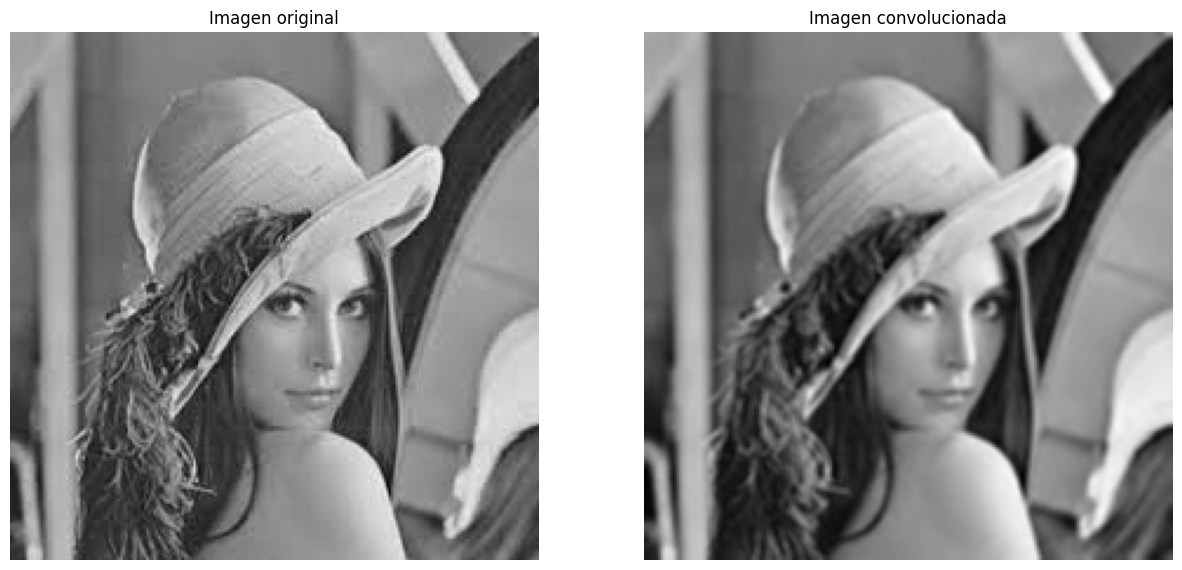

In [ ]:
# EJERCICIO 5

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en escala de grises
image_path = images_path+'lena.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error al cargar la imagen")
else:
    # Definir el kernel de convolución
    kernel = np.ones((3, 3), np.float32) / 9

    # Aplicar la convolución
    convolved_image = cv2.filter2D(image, -1, kernel)

    # Mostrar la imagen original
    plt.subplot(1, 2, 1)
    plt.title('Imagen original')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Mostrar la imagen convolucionada
    plt.subplot(1, 2, 2)
    plt.title('Imagen convolucionada')
    plt.imshow(convolved_image, cmap='gray')
    plt.axis('off')

    plt.show()


### <font color="blue"><b><i>Pensándolo bien (1)</i></b></font>
**Responde a las siguientes preguntas** sobre la convolución:
- ¿Cuál es la diferencia entre la imagen original y la convolucionada?
    <p style="margin: 4px 0px 6px 5px; color:blue"><i>La imagen original muestra detalles más nítidos y rugosos, mientras que la imagen convolucionada aparece más suavizada. </i></p>
- Puedes adivinar cuál es la técnica de PI que implementa dicho KERNEL?
    <p style="margin: 4px 0px 6px 5px; color:blue"><i>El kernel utilizado es un kernel de suavizado promedio. Esta técnica se utiliza comúnmente para reducir el ruido y suavizar una imagen, lo que resulta en una apariencia más uniforme y menos rugosa de la imagen.</i></p>



Además, puedes utilizar [esta demo](https://setosa.io/ev/image-kernels/) para entender de forma visual el operador de convolución para el tratamiento de imágenes. De todas formas, **no te preocupes si no lo entiendes del todo**, la convolución es una operación compleja que tiene múltiples aplicaciones y que se irá entendiendo progresivamente mientras realizas ejercicios prácticos. Emocionante, ¿verdad?


# 2.2 Suavizado (Smoothing)

Las imágenes pueden presentar distintos niveles de ruido, es decir, una variación aleatoria de la información de brillo o color. Se produce principalmente por la respuesta del sensor (más en la tecnología CMOS), la conversión analógico-digital y los errores de bit en la transmisión.

Hay dos tipos típicos de ruidos:

- **Ruido de sal y pimienta** (píxeles blancos y negros en lugares aleatorios de la imagen) o **ruido de impulsos** (sólo píxeles blancos).

- **Ruido gaussiano** (las intensidades se ven afectadas por un error gaussiano aditivo de media cero).

<!--<img src="./imagenes/ruido.png" width="800">  -->

<img src='https://drive.google.com/uc?export=view&id=1bxCLnF9OZd6IMFlZsDPcggaDbBZlV1Lh' width="800">

En esta sección, vamos a conocer algunas técnicas de suavizado destinadas a eliminar o reducir este tipo de ruido, entre las que se incluyen:

- Métodos basados en la convolución
  - Promedio de vecindad
  - Filtro gaussiano
- Filtro de mediana

## Contexto del problema - Reconocimiento del número de placa de automóviles

<!--<img src="./imagenes/sistema_acceso.png" width="400">-->
<img src='https://drive.google.com/uc?export=view&id=1bqoT6cX25c4lvHzfo2_ywSz-VqzBMzO1' width=400>

Volviendo al problema de acceso al estacionamiento en la UNI, estaban agradecidos con su trabajo anterior. Después de algunas pruebas, hubo algunas quejas sobre la binarización porque no está funcionando tan bien como esperaban, se sospecha que las dificultades son causadas por el ruido de la imagen. La cámara que se está utilizando en el sistema está teniendo algunos problemas, diferentes tipos de ruido están apareciendo en las imágenes capturadas. Las imágenes `ruidosa_1.jpg` y `ruidosa_2.jpg` son ejemplos de esos problemas.

Se le pide de nuevo que les proporcione alguna ayuda con este problema.

First, try to **display both images** and see what is the problem.

### **<span style="color:green"><b><i>EJERCICIO 6: Echando un vistazo a las imágenes</i></b></span>** (1 punto)

Primero, intenta **visualizar ambas imágenes** y comprueba cuál es el problema.

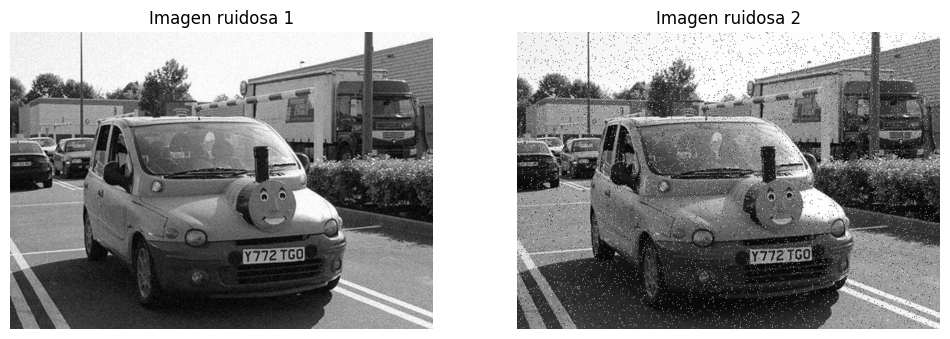

In [ ]:
# EJERCICIO 6

import cv2
import matplotlib.pyplot as plt

# Rutas de las imágenes en Google Drive
#image_path_1 = '/content/drive/MyDrive/imagenes/ruidosa_1.jpg'
#image_path_2 = '/content/drive/MyDrive/imagenes/ruidosa_2.jpg'

#Rutas en el local
image_path_1 = images_path+'ruidosa_1.jpg'
image_path_2 = images_path+'ruidosa_2.jpg'

# Leer las imágenes
image_1 = cv2.imread(image_path_1, cv2.IMREAD_COLOR)
image_2 = cv2.imread(image_path_2, cv2.IMREAD_COLOR)

# Verificar si las imágenes se cargaron correctamente
if image_1 is None or image_2 is None:
    print("Error al cargar las imágenes")
else:
    # Visualizar las imágenes en un gráfico 1x2
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Imagen ruidosa 1')
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Imagen ruidosa 2')
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

### <font color="blue"><b><i>Pensándolo bien (1)</i></b></font>

Una vez visualizadas ambas imágenes, **responde a las siguientes preguntas:**

- Cuál es la diferencia entre ellas?
    <p style="margin: 4px 0px 6px 5px; color:azul"><i>La diferencia consiste en la sengunda imagen se ve mas ruidosa</i></p>
- Por qué puede ocurrir esto?
    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Las imágenes pueden presentar diferentes tipos de ruido debido a varias razones, como las condiciones de captura, la calidad de la cámara, los ajustes de iluminación, entre otros.</i></p>   

## 2.2.1 Métodos basados en la convolución

Existen algunas técnicas de suavizado interesantes basadas en la operación matemática de convolución que pueden ayudarle a paliar el problema del ruido. Dos ejemplos son el **neighborhood averaging** y el **filtro gaussiano**.



### a) Neighborhood averaging


Convolucionar una imagen con un kernel *pequeño* es similar a aplicar una función sobre toda la imagen. Por ejemplo, utilizando la convolución es posible aplicar el primer operador de suavizado que vas a probar, **neighborhood averaging**. Este operador promedia los valores de intensidad de los píxeles que rodean a uno dado, eliminando eficazmente el ruido. Formalmente:


$S(i,j) = \frac{1}{p} \sum_{(m,n)\in s} I(m,n)$

siendo $s$ el conjunto de $p$ píxeles en la vecindad ($m x n$) de $(i,j)$. La convolución nos permite implementarla utilizando un kernel, ¡lo que resulta en una operación lineal! Por ejemplo, para una vecindad de 3x3:

<table>
	<tbody>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
	</tbody>
</table>

Puedes pensar que el kernel es como una matriz de pesos para los píxeles vecinos, y la convolución como un doble bucle `for` que aplica el kernel píxel a píxel sobre la imagen.

El **principal inconveniente** de esta técnica es el desenfoque de los bordes que aparecen en la imagen.


### **<span style="color:green"><b><i>EJERCICIO 7: Applying el filtro promedio (Average Filter)</i></b></span>** (1.5 puntos)

Completa el método **average_filter** que convoluciona una imagen de entrada usando un kernel cuyos valores dependen de su tamaño (por ejemplo, para un tamaño 3x3 sus valores son 1/9, para un tamaño 5x5 1/25 y así sucesivamente). Luego muestra las diferencias entre la imagen original y la resultante si `verbose` es True. Este metodo toma la imagen y el tamaño de apertura del kernel como entrada y devuelve la imagen suavizada.

*Tip: OpenCV define el metodo de convolución 2D (2D-convolution) [cv2.filter2D()](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) de la siguiente forma:*
-  El parámetro `ddepth` significa la profundidad deseada de la imagen de destino.
- *Las  imágenes de entrada suelen ser enteros sin signo de 8 bits (`ddepth`=cv2.CV_8U).*
- *Sin embargo, a veces se requiere que la salida sea de 16 bits con signo (`ddepth`=cv2.CV_16S)*

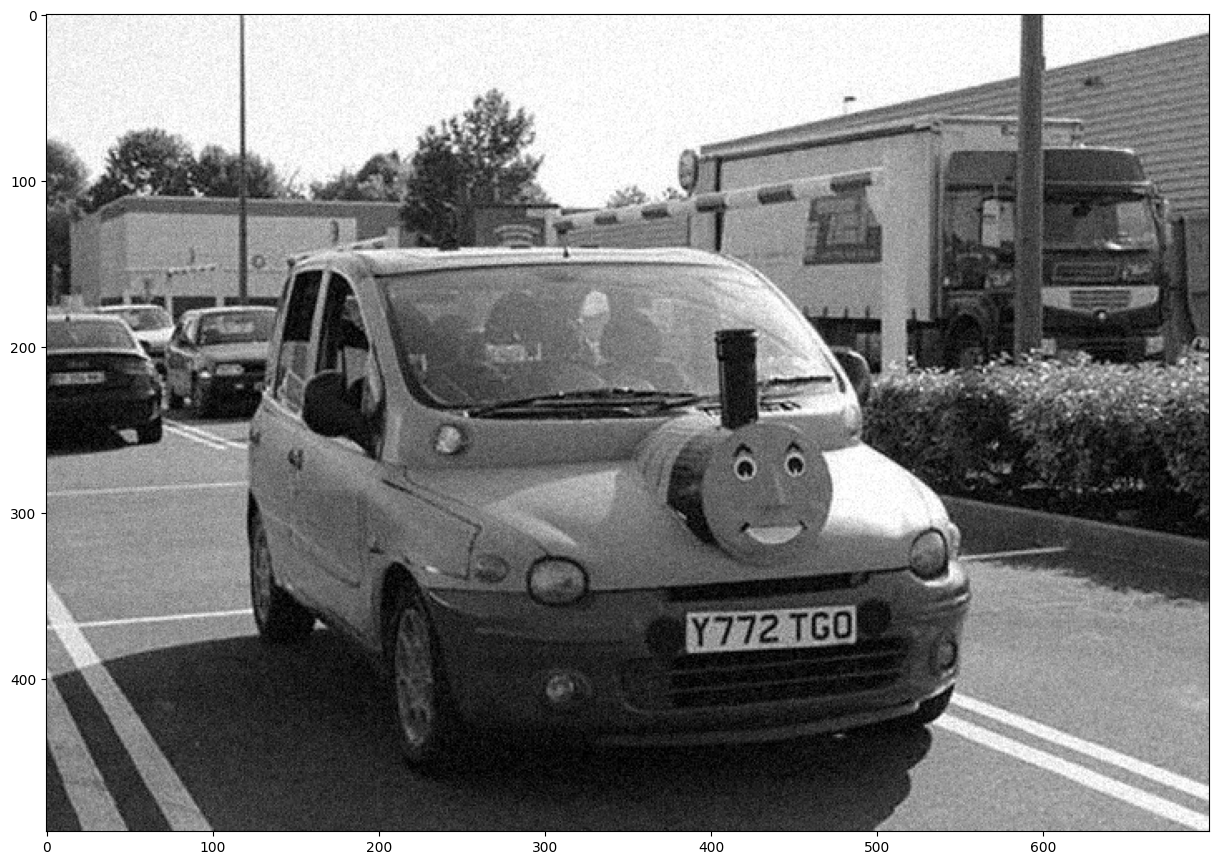

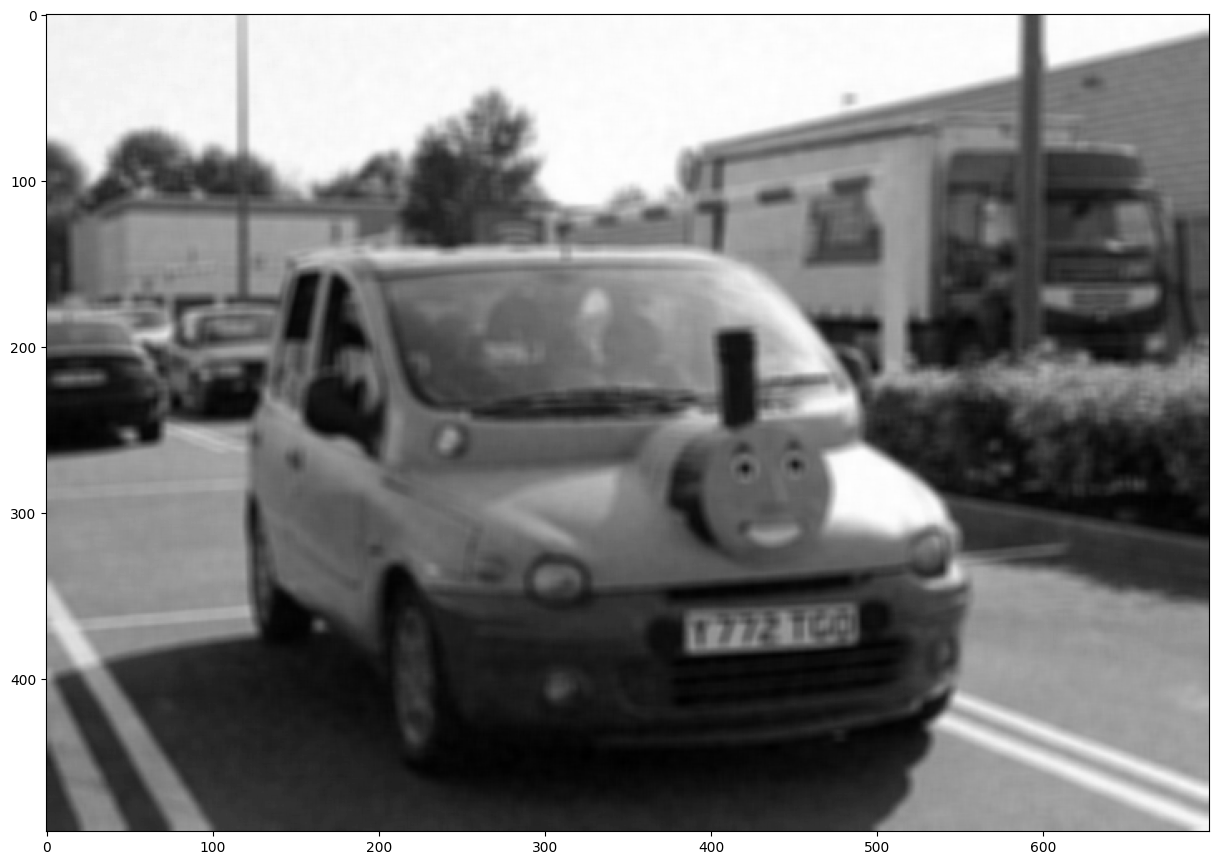

In [ ]:
# EJERCICIO 7
# Implementar una función que aplique un 'average filter' a una imagen de entrada.
# El tamaño del kernel del filtro también es un dato de entrada.
# Muestra la imagen de entrada y la resultante en un plot 1x2.
def average_filter(image, w_kernel, verbose=True):
    """ Aplica el promediado de vecindad a una imagen y la muestra.
        Args:
            image: Imagen de entrada
            w_kernel: Tamaño de apertura del núcleo
            verbose:  Sólo muestra imágenes si es True
        Returns:
            smoothed_img:  imagen suavizada
    """
    # Crear el kernel
    value=1/(w_kernel*w_kernel)
    kernel=kernel_matrix = np.full((w_kernel, w_kernel), value)
    # Convoluciar imagen y kernel
    image_conv=cv2.filter2D(image,-1,kernel)

    if verbose:
        # Mostrar la imagen inicial
        plt.figure()
        plt.imshow(image, cmap='gray')
        # Mostrar la resultante
        plt.figure()
        plt.imshow(image_conv, cmap='gray')
        plt.show()

picture = cv2.imread(images_path + 'ruidosa_1.jpg',cv2.IMREAD_GRAYSCALE)
w_kernel=7
average_filter(picture,w_kernel)

Puede utilizar el siguiente fragmento de código para **comprobar si sus resultados son correctos**:

<font color='blue'>**Salida esperada:** </font>

    [[ 9 12  9 12]  
    [  8 10  8 10]  
    [  7 10  8 11]  
    [  5  7  6  8]]

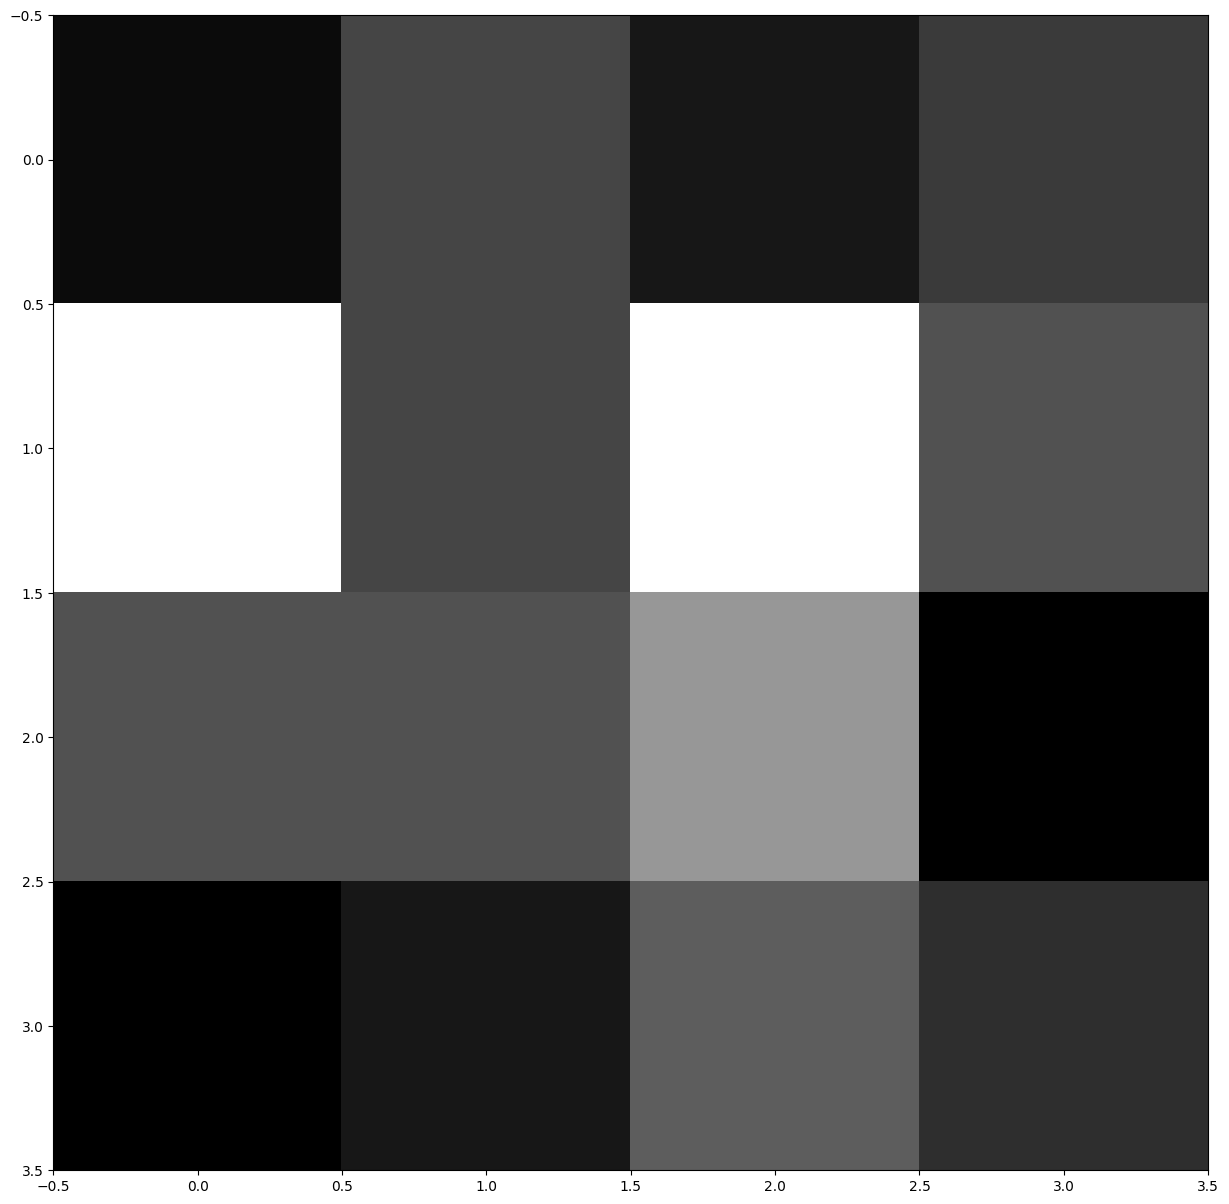

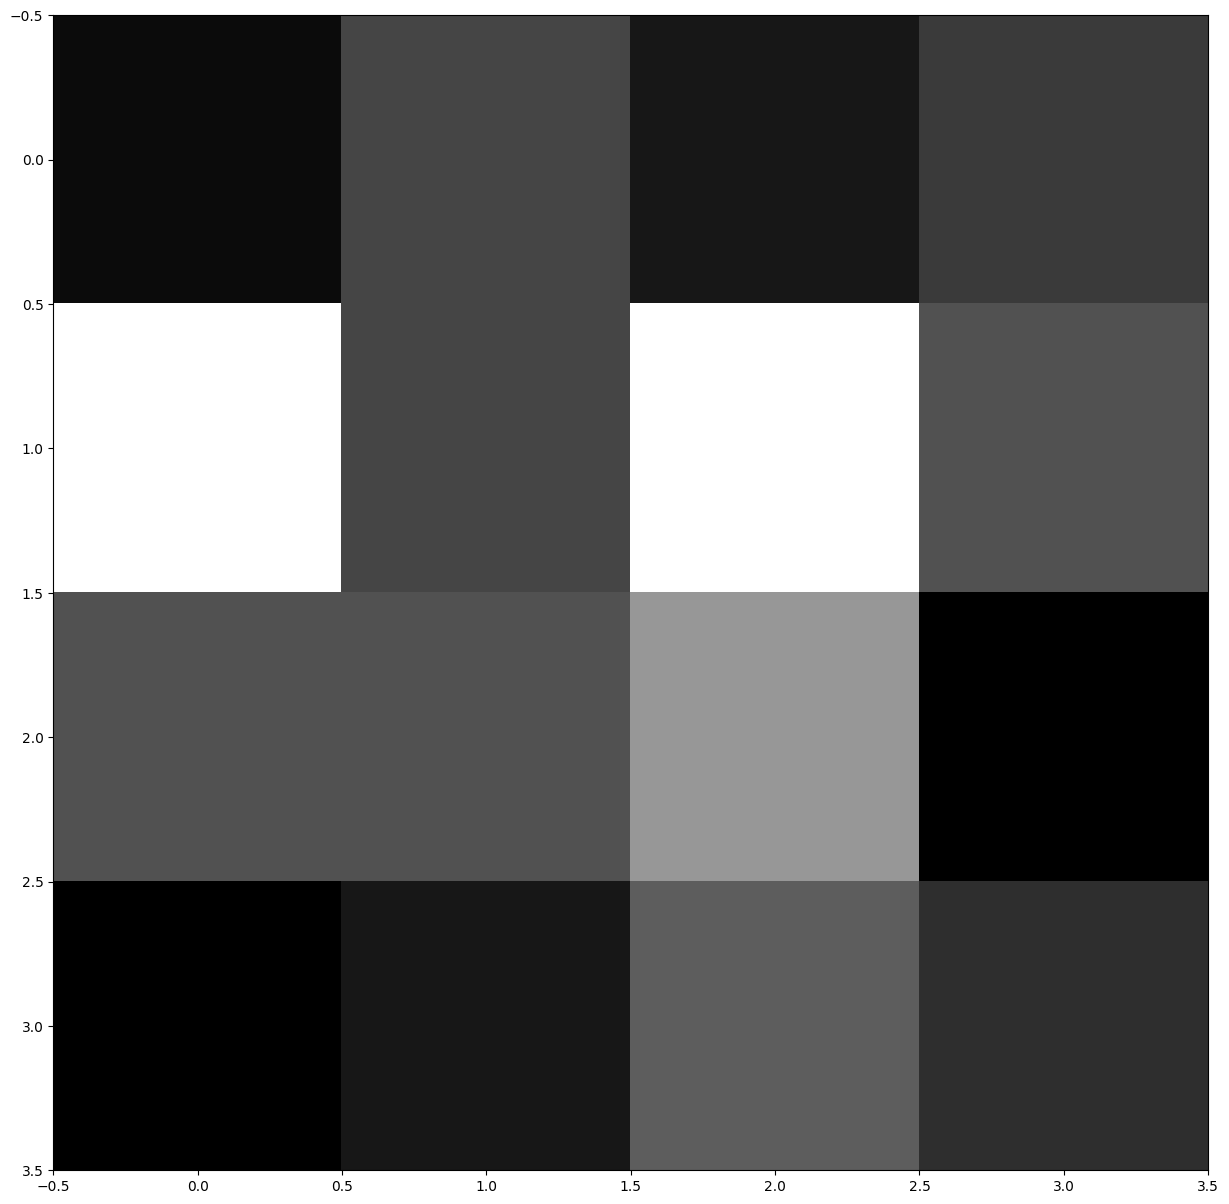

None


In [ ]:
# Prueba este codigo
image = np.array([[1,6,2,5],[22,6,22,7],[7,7,13,0],[0,2,8,4]], dtype=np.uint8)
w_kernel = 1
print(average_filter(image, w_kernel))

### <font color="blue"><b><i>Pensándolo bien (2)</i></b></font>
**Se te  pide** que pruebes **average_filter** utilizando las dos imágenes ruidosas `ruidosa_1.jpg` y `ruidosa_2.jpg`. A continuación, **responde a las siguientes preguntas**:

- ¿Se elimina el ruido en la primera imagen?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Diria que si, pero hasta cierto punto, porque con ciertos ruidos aparecen como motas circulares en el cielo principalmente</i></p>

- ¿Se elimina el ruido en la segunda imagen?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>No, directamente diria que hasta hace que el ruido resalte porque hace que cada punto se note mas, emborronado pero igual notorio</i></p>

- ¿Cuál es un buen valor para `w_kernel`?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Diria que 3, incluso 5 si no importa mucho los detalles e importa borrar mas las imperfecciones porque de 7 a mas se pierde demasiado detalle y se ve todo muy borroso</i></p>


In [ ]:
# Interactúa con el tamaño del kernel
noisy_img = cv2.imread(images_path + 'ruidosa_1.jpg', 0)
interactive(average_filter, image=fixed(noisy_img), w_kernel=(0,5,1), verbose=fixed(True))

interactive(children=(IntSlider(value=2, description='w_kernel', max=5), Output()), _dom_classes=('widget-inte…

### b) Gaussian filtering

Una alternativa al promediado por vecindad es el **filtrado gaussiano** (Gaussian filtering). Esta técnica aplica el mismo concepto que el promediado (una operación de convolución) pero con un kernel más complejo.


La idea es aprovechar la distribución normal para crear un kernel que mantenga los bordes mientras se suaviza. Esto se hace dando más relevancia a los píxeles que están más cerca del centro del kernel, creando un **promedio ponderado por vecindad**. Por ejemplo, considerando un kernel con una apertura de 2 ($5\times5$ size), sus valores serían:


<table>
	<tbody>
		<tr>
			<td style="border: 1px solid;">0.003</td>
			<td style="border: 1px solid;">0.013</td>
			<td style="border: 1px solid;">0.022</td>
            <td style="border: 1px solid;">0.013</td>
            <td style="border: 1px solid;">0.003</td>
		</tr>
        <tr>
			<td style="border: 1px solid;">0.013</td>
			<td style="border: 1px solid;">0.059</td>
			<td style="border: 1px solid;">0.097</td>
            <td style="border: 1px solid;">0.059</td>
            <td style="border: 1px solid;">0.013</td>
		</tr>
		<tr>
            <td style="border: 1px solid;">0.022</td>
			<td style="border: 1px solid;">0.097</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">0.159</td>
			<td style="border: 1px solid;">0.097</td>
            <td style="border: 1px solid;">0.022</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">0.013</td>
			<td style="border: 1px solid;">0.059</td>
			<td style="border: 1px solid;">0.097</td>
            <td style="border: 1px solid;">0.059</td>
            <td style="border: 1px solid;">0.013</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">0.003</td>
			<td style="border: 1px solid;">0.013</td>
			<td style="border: 1px solid;">0.022</td>
            <td style="border: 1px solid;">0.013</td>
            <td style="border: 1px solid;">0.003</td>
		</tr>        
	</tbody>
</table>


Para definir un kernel de este tipo se utiliza la campana de Gauss:

En 1-D:
$$g_{\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{x^2}{2\sigma^2}\right)$$

En 2-D, podemos hacer uso de la *propiedad de separabilidad* para separar filas y columnas, resultando en convoluciones de dos kernels 1D:

$$g_{\sigma}(x,y) = \underbrace{\frac{1}{2\pi\sigma^2}exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)}_{g}
= \underbrace{\frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{x^2}{2\sigma^2}\right)}_{g_x}*
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{y^2}{2\sigma^2}\right)}_{g_y}
$$

Por ejemplo:

<div style="margin: 0 auto; text-align: center; display: table;">

<div style = "padding: 10px; display: table-cell; vertical-align: middle;">$g=g_y\otimes g_x\rightarrow$ </div>
    
<table style = "display: table-cell; vertical-align: middle;">
	<tbody>
		<tr>
			<td style="border: 1px solid;">1</td>
			<td style="border: 1px solid;">2</td>
			<td style="border: 1px solid;">1</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">2</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">4</td>
			<td style="border: 1px solid;">2</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1</td>
			<td style="border: 1px solid;">2</td>
			<td style="border: 1px solid;">1</td>
		</tr>
	</tbody>
</table>
    
<div style = "padding: 10px; display: table-cell; vertical-align: middle;"> $=$ </div>
    
<table style = "display: table-cell; vertical-align: middle;">
	<tbody>
		<tr>
			<td style="border: 1px solid;">1</td>
		</tr>
		<tr>
			<td style="border: 1px solid;" bgcolor="#81F7F3">2</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1</td>
		</tr>
	</tbody>
</table>
    
<div style = "padding: 10px; display: table-cell; vertical-align: middle;"> $\otimes$ </div>
    
<table style = "display: table-cell; vertical-align: middle;">
	<tbody>
		<tr>
			<td style="border: 1px solid;">1</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">2</td>
			<td style="border: 1px solid;">1</td>
		</tr>
	</tbody>
</table>
</div>

Y debido a la *propiedad asociativa*:

$$\underbrace{f \otimes g}_{\text{2D convolution}} =
f \otimes (g_x \otimes g_y) = \underbrace{(f \otimes g_x) \otimes g_y}_{\text{Two 1D convolutions}}$$

El grado de suavizado de este filtro puede ser controlado por el parámetro $\sigma$, es decir, la **desviación estándar** de la distribución gaussiana utilizada para construir el kernel. Cuanto mayor sea el $\sigma$, mayor será el suavizado, ¡pero podría resultar en una imagen más borrosa!

El parámetro $\sigma$ también influye en el valor de **apertura del kernel** a utilizar, ya que debe ser proporcional. Tiene que ser lo suficientemente grande para tener en cuenta valores no despreciables en el kernel. Por ejemplo, en el kernel de abajo, no tiene sentido aumentar su apertura (actualmente $1$) ya que las nuevas filas/columnas tendrían valores muy pequeños:


<table>
	<tbody>
		<tr>
			<td style="border: 1px solid;">1</td>
			<td style="border: 1px solid;">15</td>
			<td style="border: 1px solid;">1</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">15</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">100</td>
			<td style="border: 1px solid;">15</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1</td>
			<td style="border: 1px solid;">15</td>
			<td style="border: 1px solid;">1</td>
		</tr>
	</tbody>
</table>


### **<span style="color:green"><b><i>EJERCICIO 8: Implementación del famoso filtro gaussiano</i></b></span>** (2.5 puntos)
Completa el método `gaussian_filter()` de forma similar al anterior, pero incluyendo un nuevo parámetro: `sigma`, que representa la desviación estandar de la distribución gaussiana utilizada para construir el kernel.
*Consejo: Ten en cuenta que NumPy define funciones matemáticas que operan sobre matrices como [exponencial](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) o [raíz cuadrada](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), así como [constantes] matemáticas(https://docs.scipy.org/doc/numpy/reference/constants.html) como `np.pi`. Recuerda la propiedad asociativa de la convolución*.




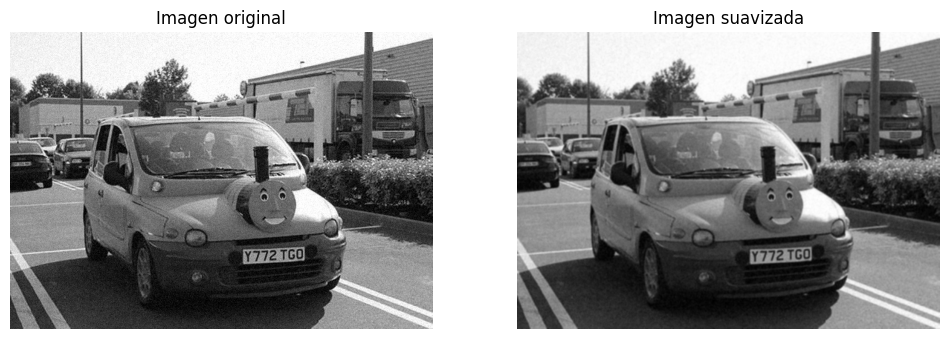

In [ ]:
# Implementa una función que:
# -- cree un filtro Gaussiano 2D (tip: se puede hacer implementando un filtro Gaussiano 1D y haciendo el producto externo (outer product) del kernel 1D consigo mismo)
# -- convoluciona la imagen de entrada con el kernel
# -- muestra la imagen de entrada y la filtrada en un PLOT 1x2 (si verbose=True)
# -- devuelve la imagen suavizada
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_filter(image, w_kernel, sigma):
    """ Aplica un filtro gaussiano a una imagen.

        Args:
            image: Imagen de entrada
            w_kernel: Tamaño de apertura del kernel
            sigma: desviación estándar de la distribución gaussiana

        Returns:
            smoothed_img: imagen suavizada
    """

    # Crear kernel gaussiano 1D
    kernel_1D = np.linspace(-w_kernel // 2 + 1, w_kernel // 2, w_kernel)
    kernel_1D = np.exp(-kernel_1D ** 2 / (2 * sigma ** 2))

    # Normalizar el kernel
    kernel_1D /= kernel_1D.sum()

    # Extender el kernel 1D a un kernel 2D
    kernel_2D = np.outer(kernel_1D, kernel_1D)

    # Convolucionar la imagen con el kernel 2D
    smoothed_img = cv2.filter2D(image.astype(np.float32), -1, kernel_2D)

    return smoothed_img.astype(np.uint8)

# Cargar la imagen ruidosa_1.jpg
image_path = images_path+'ruidosa_1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Definir el tamaño del kernel y la desviación estándar
w_kernel = 5
sigma = 1

# Aplicar el filtro gaussiano a la imagen
smoothed_image = gaussian_filter(image, w_kernel, sigma)

# Mostrar la imagen original y la imagen suavizada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Imagen original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen suavizada')
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.show()



```
# Tiene formato de código
```

De nuevo, puedes utilizar el siguiente código para **comprobar si tus resultados son correctos**:


In [ ]:
image = np.array([[1,6,2,5],[10,6,22,7],[7,7,13,0],[0,2,8,4]], dtype=np.uint8)
w_kernel = 1
sigma = 1
print(gaussian_filter(image, w_kernel,sigma))

[[ 1  6  2  5]
 [10  6 22  7]
 [ 7  7 13  0]
 [ 0  2  8  4]]


### <font color='blue'>**Expected output:**  </font>

    [[5 6 7 8]
     [5 7 7 8]
     [4 6 7 7]
     [3 5 5 5]]

### **<span style="color:green"><b><i>EJERCICIO 9: Reflexiones finales </i></b></span>** (1 punto)

### <font color="blue"><b><i>Pensándolo bien (3)</i></b></font>
**Se le  pide que** pruebe **gaussian_filter** utilizando ambas imágenes ruidosas `ruidosa_1.jpg` y `ruidosa_2.jpg`. A continuación, **responde a las siguientes preguntas**:

- ¿Se elimina el ruido en la primera imagen?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Para esta imagen si se elimina el ruido pero en bajo nivel.</i></p>

- ¿Se elimina el ruido en la segunda imagen?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>En este caso, se nota mejor que el ruido se elimina o reduce</i></p>

- ¿Cuál es un buen valor para `w_kernel` y `sigma`?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Los valores para w_kernel = 5 ; sigma = 1</i></p>

### <font color="blue"><b><i>Pensándolo bien (4)</i></b></font>
Por último, puedes comprobar los métodos que has implementado en ambas imágenes ruidosas ejecutando el siguiente código.
- **¿Qué método elegirías** para una implementación final en el sistema? **¿Por qué?*
    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Elegiría el filtro gaussiano para una implementación final en el sistema. Aunque ambos métodos reducen el ruido, el filtro gaussiano tiende a preservar mejor los bordes y detalles importantes de la imagen, ofreciendo una suavización más natural. Además, el filtro gaussiano es más versátil y puede adaptarse mejor a diferentes tipos de ruido y condiciones de imagen.</i></p>

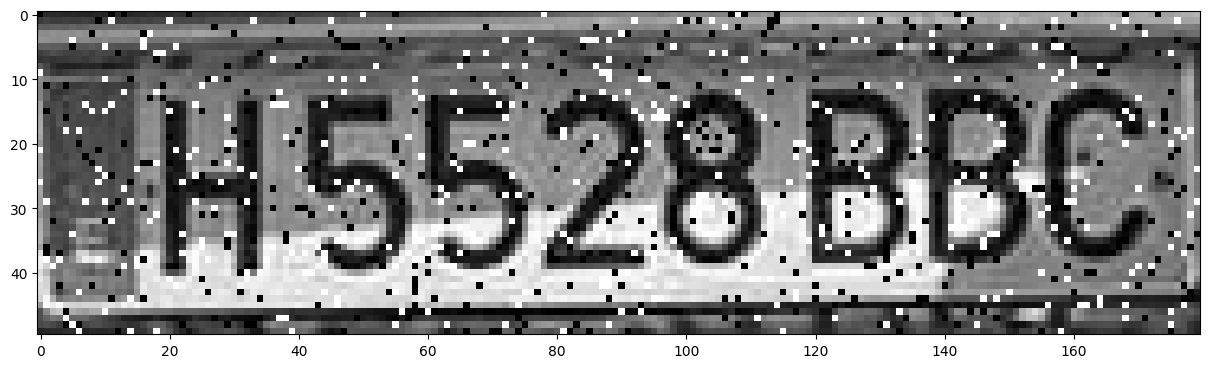

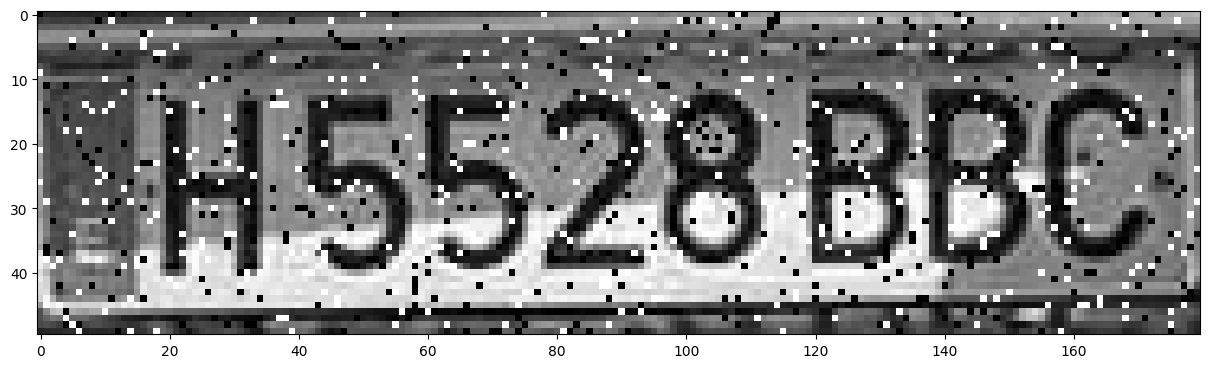

TypeError: Image data of dtype object cannot be converted to float

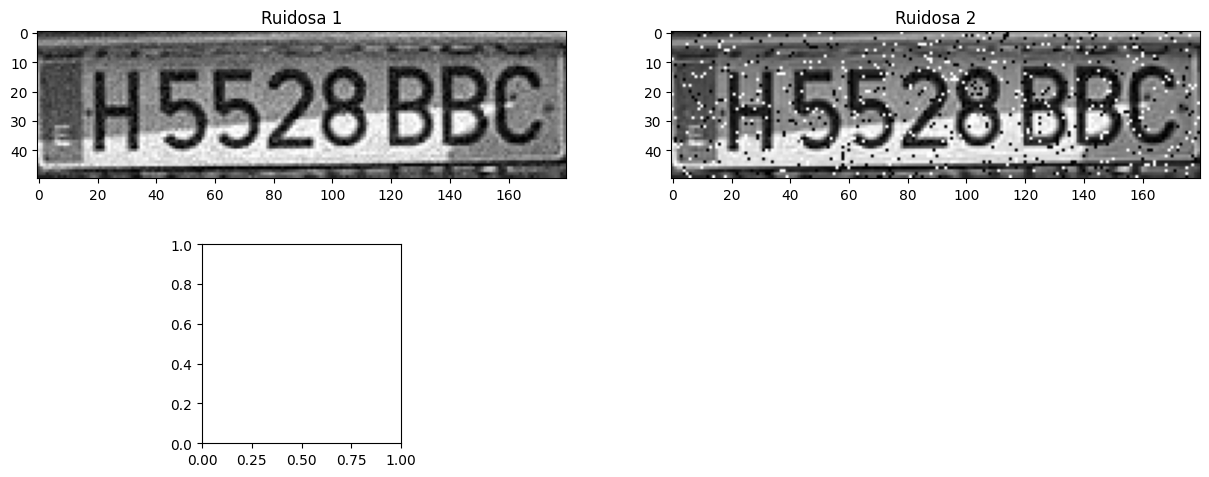

In [ ]:
image_path_1=images_path+'rafaga1_0.jpg'
image_path_2=images_path+'rafaga2_0.jpg'

# Lectura de la primera imagen ruidosa
im1 = cv2.imread(image_path_1, 0)
im1 = im1[290:340,280:460]

#  Leer la segunda imagen ruidosa
im2 = cv2.imread(image_path_2, 0)
im2 = im2[290:340,280:460]

# Aplicar  neighborhood averaging
neighbor1 = average_filter(im1, 1)
neighbor2 = average_filter(im2, 1)

# Aplicar  Gaussian filter
gaussian1 = gaussian_filter(im1, 2,1)
gaussian2 = gaussian_filter(im2, 2,1)

# Mostrar resultados
plt.subplot(521)
plt.imshow(im1, cmap='gray')
plt.title('Ruidosa 1')

plt.subplot(522)
plt.imshow(im2, cmap='gray')
plt.title('Ruidosa 2')

plt.subplot(523)
plt.imshow(neighbor1, cmap='gray')
plt.title('Neighborhood averaging')

plt.subplot(524)
plt.imshow(neighbor2, cmap='gray')
plt.title('Neighborhood averaging')

plt.subplot(525)
plt.imshow(gaussian1, cmap='gray')
plt.title('Gaussian filter')

plt.subplot(526)
plt.imshow(gaussian2, cmap='gray')
plt.title('Gaussian filter')

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Procesamiento_Imagenes_Parte_1v1_Grupo R.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Procesamiento_Imagenes_Parte_1v1_Grupo R.ipynb to pdf
[NbConvertApp] Support files will be in Procesamiento_Imagenes_Parte_1v1_Grupo R_files/
[NbConvertApp] Making directory ./Procesamiento_Imagenes_Parte_1v1_Grupo R_files
[NbConvertApp] Making directory ./Procesamiento_Imagenes_Parte_1v1_Grupo R_files
[NbConvertApp] Making directory ./Procesamiento_Imagenes_Parte_1v1_Grupo R_files
[NbConvertApp] Making directory ./Procesamiento_Imagenes_Parte_1v1_Grupo R_files
[NbConvertApp] Making directory ./Procesamiento_Imagenes_Parte_1v1_Grupo R_files
[NbConvertApp] Making directory ./Procesamiento_Imagenes_Parte_1v1_Grupo R_files
[NbConvertApp] Making directory ./Procesamiento_Imagenes_Parte_1v1_Grupo R_files
[NbConvertApp] Making directory ./Procesamiento_Imagenes_Parte_1v1_Grupo R_files
[NbConvertApp] Making directory ./Procesamiento_Imagenes_Parte_1v1_Grupo R_files
[NbConvertApp] Making directory ./Procesamiento_Imagene


## Conclusión
Excelente! Con este cuaderno hemos:
- Aprendido conceptos básicos dentro del procesado de imágenes como histogramas, brillo, contraste, binarización y Look-up Tables.
- Jugado un poco con ellos en el contexto de un sistema de reconocimiento de matrículas, observando su utilidad para mejorar la calidad de una imagen según nuestras necesidades.
- Comprendido el funcionamiento de la convolución.
- Entendido cómo reducir el ruido en las imágenes, tanto para el ruido sal y pimienta como para el ruido gaussiano.
- Entender qué métodos son útiles para cada tipo de ruido y cuáles no.
- Aprendido a aplicar la convolución e implementaciones eficientes de algunos kernels.

Si quieres mejorar tus conocimientos sobre el ruido en imágenes digitales, puedes navegar por internet buscando *speckle noise* y *Poisson noise*.